In [44]:
import numpy as np
import pandas as pd
import json
import tweepy
import time
import requests
import matplotlib.pyplot as plt

# Data gathering

In [45]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [46]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [47]:
url="https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv"
response=requests.get(url)
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)
image_predictions=pd.read_csv('image_predictions.tsv', sep='\t')

In [44]:
#tweet_id_ =list(twitter_archive['tweet_id'])
consumer_key = 'j7w3jhaNyokoPhpHCfuEXwVyy'
consumer_secret = 'u9JCANAU11auyS7Nyirj5vAATcqHm4Z67GDa08HT4dkhkGSrmD'
access_token = '1897230336-395MyapdlrJdkgzA69DsXUoJq4axNHurQqsuMA2'
access_secret = 'HEaut7FEQ7FKhSqEIhyg2NunapWvuzVNu6LEo4D0hK7tq'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [48]:
tweet_list=[]
with open('tweet_json.txt','r') as f:
    for row in f:
        json_dict= json.loads(row)  
        to_append= {
            'tweet_id':json_dict['id'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count'],
            'lang':json_dict['lang'],
            'full_text':json_dict['full_text']
        }
        tweet_list.append(to_append)
tweet_info=pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count','lang','full_text'])

# Data Assesing

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
an           7
Buddy        7
Bailey       7
Daisy        7
Toby         7
Oscar        6
Scout        6
Koda         6
Jack         6
Leo          6
Rusty        6
Dave         6
Stanley      6
Jax          6
Milo         6
Bella        6
Bentley      5
          ... 
Kellogg      1
Rey          1
Vince        1
Koko         1
Shiloh       1
Taz          1
Snoopy       1
Rupert       1
Mack         1
Bradley      1
Tug          1
Petrick      1
Ralph        1
Shikha       1
Ulysses      1
Chloe        1
Geno         1
Spark        1
Dunkin       1
Mollie       1
Richie       1
Patch        1
Alfy         1
Bloop        1
Callie       1
Creg         1
Edmund       1
Buddah       1
Keet         1
Sandra       1
Name: name, Length: 957, dtype: int64

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
lang              2352 non-null object
full_text         2352 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [14]:
tweet_info.head()

,tweet_id,retweet_count,favorite_count,lang,full_text
0,892420643555336193,8842,39492,en,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6480,33786,en,This is Tilly. She's just checking pup on you....
2,891815181378084864,4301,25445,en,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8925,42863,en,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9721,41016,en,This is Franklin. He would like you to stop ca...


In [15]:
tweet_info.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


### Quality
1. twitter_archive: Tweet ID# 835246439529840640 has rating_denominator 0 which is impossible
2. twitter_archive: Tweet ID# 835152434251116546, and Tweet ID# 746906459439529985 don't have rating rating_numerator
3. twitter_archive: timestamp type is wrong
4. twitter_archive: dog name wrong
5. twitter_archive: Missing values in 'name' and dog stages showing as 'None'
6. twitter_archive: data contains retweets
7. remove the rows that without picture
8. tweet_info: the 'lang' variable has inappropriate name 
9. tweet_info: the 'lang' variable has wront datatype

### Tidiness
1. combine three dataframe to single one dataframe
2. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
3. rating column contains two part rating_numerator and rating_denominator, consider combining them 

# Data Cleaning

In [90]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

### Define
1. Add retweet_count, favorite_count, lang to the twitter_archive_clean by merging tweet_info_clean and twitter_archive_clean.
2. Merge three table into one table so that twitter_archive_clean also has image_predictions information 
3. remove the rows without dog pictures

### Code

In [91]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_info_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

### Define
After merging three tables together, we found some duplicates.
1. remove duplicated rows
2. remove retweeted rows where retweeted_status_id' is not null whichi means it it a retweet

### Code

In [92]:
twitter_archive_clean=twitter_archive_clean.drop_duplicates()
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

### Define
Drop columns related to retweets

### Code

In [93]:
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
lang                     1994 non-null object
full_text                1994 non-null object
jpg_url                  1994 non-null object
img_num                  1

### Define
1. create column "dog_stage" by extracting information from "text",then we can remove ['doggo', 'floofer', 'pupper', 'puppo'] these four redundant columns
2. combine the "rating_numerator" and "rating_denominator" as "rating"

### Code

In [99]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.findall('(doggo|pupper|puppo|floof)')
twitter_archive_clean['dog_stage']=twitter_archive_clean['dog_stage'].apply(lambda x: ','.join(set(x)))
twitter_archive_clean['dog_stage']=twitter_archive_clean['dog_stage'].replace('',np.nan)
twitter_archive_clean['rating']=twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo','rating_numerator','rating_denominator'], axis=1)

### Test

In [100]:
twitter_archive_clean['dog_stage'].value_counts()

pupper          221
doggo            66
puppo            26
floof            22
doggo,pupper      8
doggo,puppo       2
Name: dog_stage, dtype: int64

In [143]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
lang                     1994 non-null object
full_text                1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   

### Define
change the column "lang" as "language"

### Code

In [144]:
twitter_archive_clean['language']=twitter_archive_clean['lang']
twitter_archive_clean = twitter_archive_clean.drop('lang', axis=1)

### Test

In [145]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
full_text                1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       19

### Define
make each column fully displayed 

### Code

In [146]:
pd.set_option('display.max_colwidth', -1)

### Test

In [147]:
twitter_archive_clean.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating,language
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,8842,39492,...,False,bagel,0.085851,False,banana,0.076110,False,,1.3,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,6480,33786,...,True,Pekinese,0.090647,True,papillon,0.068957,True,,1.3,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,4301,25445,...,True,malamute,0.078253,True,kelpie,0.031379,True,,1.2,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,8925,42863,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,,1.3,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,9721,41016,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,,1.2,en
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,3240,20548,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,,1.3,en
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,2142,12053,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,,1.3,en
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,19548,66596,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,,1.3,en
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphon

### Define
1. Change the incorrect dog names
2. Change "None" to "NaN" for "name" column

### Code

In [148]:
twitter_archive_clean['name'] = twitter_archive_clean.text.str.extract('(?:This is|named|Meet|Say hello to|name is|Here we have)\s([A-Z][^\s.,]*)')

In [149]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.NaN)

### Test

In [150]:
twitter_archive_clean.name.sort_values()

836     Abby        
847     Abby        
768     Ace         
1656    Acro        
1109    Adele       
1657    Aiden       
66      Aja         
382     Akumi       
663     Al          
1676    Albert      
711     Albert      
327     Albus       
120     Albus       
919     Aldrick     
1767    Alejandro   
297     Alexander   
991     Alexanderson
387     Alf         
290     Alfie       
1956    Alfie       
695     Alfie       
1364    Alfie       
1953    Alfonso     
1881    Alfredo     
46      Alfy        
160     Alice       
1441    Alice       
1867    Alphred     
1259    Amber       
1116    Ambrose     
         ...        
2043    NaN         
2044    NaN         
2045    NaN         
2046    NaN         
2047    NaN         
2048    NaN         
2049    NaN         
2050    NaN         
2051    NaN         
2052    NaN         
2053    NaN         
2054    NaN         
2055    NaN         
2056    NaN         
2057    NaN         
2058    NaN         
2059    NaN  

### Define
remove 2rows that have no ratings

### Code

In [151]:
twitter_archive_clean[twitter_archive_clean['rating']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating,language
248,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",NaN,3425,24478,...,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,,0.0,en
832,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,NaN,334,3158,...,False,fountain,0.199776,False,space_shuttle,0.064807,False,,0.0,en


In [152]:
twitter_archive_clean=twitter_archive_clean.drop([248,832])

### Test

In [79]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,2.300000e+01,2.300000e+01,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,6.978112e+17,4.196984e+09,12.280843,10.532096,2770.021063,8923.133400,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,4.359384e+16,0.000000e+00,41.497718,7.320710,4715.961325,12400.238808,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,2.000000,15.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,6.732411e+17,4.196984e+09,10.000000,10.000000,622.250000,1972.250000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,6.757073e+17,4.196984e+09,11.000000,10.000000,1348.500000,4117.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,7.031489e+17,4.196984e+09,12.000000,10.000000,3202.750000,11275.500000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,170.000000,79116.000000,132318.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### Define
change sources to make it more readable(remove the url)

### Code

In [154]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

### Test

In [155]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating,language
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,8842,39492,...,False,bagel,0.085851,False,banana,0.076110,False,,1.3,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,6480,33786,...,True,Pekinese,0.090647,True,papillon,0.068957,True,,1.3,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,4301,25445,...,True,malamute,0.078253,True,kelpie,0.031379,True,,1.2,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,8925,42863,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,,1.3,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,9721,41016,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,,1.2,en


### Define
Change variable type:
"source","timestamp","dog_stage","tweet_id","in_reply_to_status_id","in_reply_to_user_id"

### Code

In [156]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')

### Test

In [157]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
name                     1378 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
full_text                1992 non-null object
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  1992 non-null float64
p2_dog                   1992 non-null bool
p3            

### save the cleaned data to twitter_archive_master.csv

In [158]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Analyze and Visulization

### using describe function to analize the statistics of the data performance

In [159]:
twitter_archive_clean.describe()

,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000
mean,2770.915161,8918.218876,1.202309,0.593815,1.344477e-01,6.027290e-02,1.170423
std,4717.990596,12400.892792,0.559593,0.271948,1.006837e-01,5.090215e-02,4.068944
min,15.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.100000
25%,624.750000,1967.750000,1.000000,0.362775,5.401683e-02,1.619708e-02,1.000000
50%,1348.500000,4117.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1.100000
75%,3202.250000,11270.500000,1.000000,0.845599,1.949772e-01,9.162278e-02,1.200000
max,79116.000000,132318.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


According to this statistics summary, we can see a lot of information:

The mean retweet_count is 3069 which is quite high, so people like these rating tweets to some degree

The rating mean is 1.26, this is very interesting. As it's over 100%, this means the blogger was very kind when rating the dogs.  Because he/she give their dogs super high rating.

### Analyze the Favorites and Retweets with Time, tweet Source Distribution, and dog_stage Distribution
### Then give visualization for them

In [160]:
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

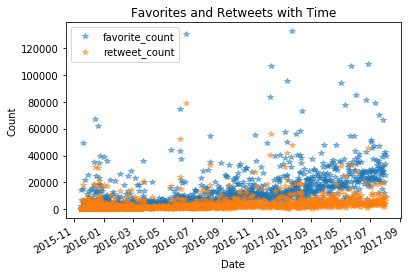

In [161]:
df[['favorite_count', 'retweet_count']].plot(style = '*', alpha = 0.5)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

This plot simply tells us usually many people will choose to "like" the tweet, relatively less people will retwet the tweet.

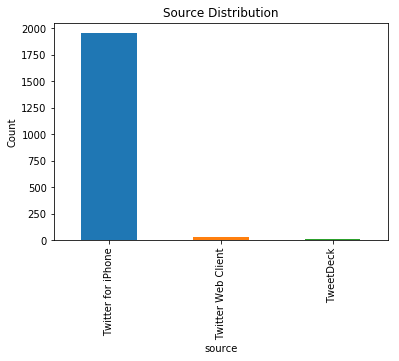

In [162]:
df_source = pd.read_csv('twitter_archive_master.csv')
df_source['source'].value_counts().plot(kind='bar');
plt.title('Source Distribution')
plt.xlabel('source')
plt.ylabel('Count');

From this bar plot we know that the blogger usually use iphone to tweet.

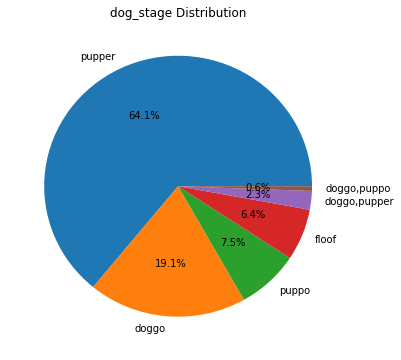

In [163]:
df_source['dog_stage'].value_counts().plot(kind='pie',autopct='%.1f%%',figsize=(6, 6),label='');
plt.title('dog_stage Distribution');

From this pie plot, we can see for those tweet who mentioned the daog_stage, over half dogs were regard as "pupper", over 20% of dogs were regard as "doggo".

In [69]:
f = [0 for x in range(10)]

In [75]:
s=['a','g','e']

In [78]:
''.join(s)

'age'